# Numerical simulation | Pendulum with free point of support

[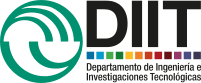](https://ingenieria.unlam.edu.ar/)  
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

## Problem
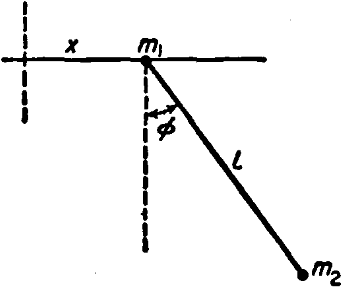

Range of times: from $t=0$ to $t=10\mathrm{\,s}$.  
Physical parameters and initial conditions:  
$m_1 = 3\mathrm{\,kg}$, $m_2 = 1\mathrm{\,kg}$, $\ell = 2\mathrm{\,m}$  
$x(0) = 1\mathrm{\,m}$, $\dot{x}(0) = 0.5\mathrm{\,ms^{-1}}$, $\phi(0) = \frac{\pi}{8}$, $\dot{\phi}(0) = 0$.

## Symbolic solution

In [6]:
import sympy as sm # import functions for symbolic manipulations
from sympy.physics import mechanics as me # from sympy we use functions for mechanics
me.init_vprinting() # dot notation for velocity and acceleration

### Physical model for this system
- Two generalized coordinates: $x, \phi$
- External potential: gravitational potential
- Constraints:
    - contact force $\vec{r}_{m_1} = x \hat{x}$
    - rope of length $\ell$ sets  
$$|\vec{r}_{m_2} - \vec{r}_{m_1}| = \ell \implies \vec{r}_{m_2} = \vec{r}_{m_1} + \ell \hat{\rho}_2$$

#### Generalized coordinates and constraints

In [7]:
# physical parameters
m1, m2, l, g = sm.symbols(r'm_1, m_2, \ell, g', positive=True)

# positions as functions of the generalized coordinates
t = sm.symbols('t') # time
x, phi = me.dynamicsymbols('x, phi')

#### Positions as functions of the generalized coordinates

In [8]:
e = me.ReferenceFrame('e') # Cartesian frame of reference
m1_r = x* (e.x) # position of mass 1: x = x(t)

The position of $m_2$ is described using the constraint.

In [9]:
m2_r = m1_r + l* (sm.cos(phi)* (- e.y) +  sm.sin(phi)* (e.x) ) # position of mass 2: defined by the constraint
m1_r, m2_r

### Translational kinetic energies

In [10]:
def energyKineticTranslation(mass, position, frameOfReference):
    """
    Given a mass and the position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of one particle
    position: (sympy.physics.vector.vector.Vector)
        of the particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which the position is expressed
    
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sm.Rational(1,2) # Rational: a quotient of integers
    T_translational = sm.Eq(
        sm.Symbol('T_\mathrm{translational}'),
        oneHalf* mass* velocity.dot(velocity)
        ).simplify()
    return T_translational

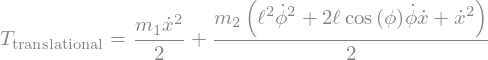

In [11]:
m1_T = energyKineticTranslation(m1, m1_r, e)
m2_T = energyKineticTranslation(m2, m2_r, e)
T = sm.Eq(
  m1_T.lhs,
  m1_T.rhs + m2_T.rhs
  ).simplify() 
T

### Potential energy

In [12]:
def energyPotentialGravitational(mass, position, accelerationGravity):
    """
    Provides the gravitational potential energy of a particle of mass m and position r in a given frame of reference in which g is the acceleration due to gravity.
    
    Parameters
    ----------
    accelerationGravity: (sympy.physics.vector.vector.Vector)
        vector oriented according to the frame of reference
    mass: (sympy.core.symbol.Symbol
        of the body
    position: (sympy.core.symbol.Symbol)
        of the center of mass in a frame of reference related to the one for the acceleration due to gravity

    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The potential energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        V = - (m \vec{accelerationGravity}) \cdot{position}
    """
    V_gravitational = sm.Eq(
        sm.Symbol('V_\mathrm{gravitational}'),
        - (mass* accelerationGravity).dot(position)
        ).simplify()
    return V_gravitational

In [ ]:
g_vector = g* (-e.y) # acceleration due to gravity on the -y axis
m1_V = energyPotentialGravitational(m1, m1_r, g_vector)
m2_V = energyPotentialGravitational(m2, m2_r, g_vector)

In [14]:
V = sm.Eq(
  m1_V.lhs,
  m1_V.rhs + m2_V.rhs
  ).simplify()
V

### Euler-Lagrange equations

In [15]:
def eulerLagrange(T, V, coordinateGeneralized):
    '''    
    Provides the Euler-Lagrange equation for one generalized coordinate starting from the energies.
    
    Parameters
    ----------
    T : Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        The potential energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        for which we are looking the Euler-Lagrange equation
        
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        Homogeneous Euler-Lagrange equation
    '''
    lagrangian = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # since we have to differentiate respect to time, the function diff declares t as a symbol
    return sm.Eq(
        lagrangian.diff(coordinateGeneralized) 
        - lagrangian.diff(coordinateGeneralized.diff(t)).diff(t)
        , 0
    ).simplify()

#### For $x$

In [16]:
x_EL = eulerLagrange(T, V, x)
x_EL

This is an homogeneous second order linear differential equation. We can isolate $\ddot{x}$.

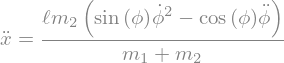

In [17]:
sm.Eq(x.diff(t,2),
       list( sm.solveset(x_EL, x.diff(t,2) ) )[0]  # solveset returns a set, that we convert into a list
      ) # acceleration = x dot dot [m s-2]

This result is a function of another acceleration, $\ddot{\phi}$.

#### For $\phi$

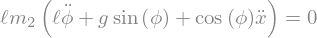

In [18]:
phi_EL = eulerLagrange(T, V, phi)
phi_EL

Again, we could try isolating the corresponding generalized acceleration.

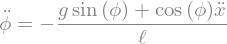

In [19]:
sm.Eq(phi.diff(t,2),
       list( sm.solveset(phi_EL, phi.diff(t,2) ) )[0]  # solveset returns a set, that we convert into a list
      )

This is also expressed as a function of another acceleration, $\ddot{x}$.

## Numerical solution of the Euler-Lagrange equations

### Solving the system of Euler-Lagrange equations

The state vector must hold the generalized coordinates and velocities.

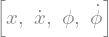

In [20]:
y = [x, x.diff(t), phi, phi.diff(t)]
y

The derivative of the state vector with respect to time will hold the generalized accelerations.
Similar to the case of a single coordinate, the acceleration must be expressed in terms of coordinates and velocities.

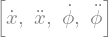

In [21]:
y_p = [y_i.diff(t) for y_i in y]
y_p

In [22]:
systemEquations = [
    x_EL,
    phi_EL,
]
variablesIsolated = [x.diff(t,2), phi.diff(t,2)] # isolate the generalized accelerations
variablesIsolated_sol= sm.nonlinsolve(systemEquations, variablesIsolated ).args[0]

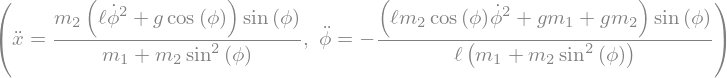

In [23]:
x_pp = sm.Eq(variablesIsolated[0], variablesIsolated_sol.args[0] ) # [m s-2]
phi_pp = sm.Eq(variablesIsolated[1], variablesIsolated_sol.args[1] ) # [m s-2]
x_pp, phi_pp

### Numerical values

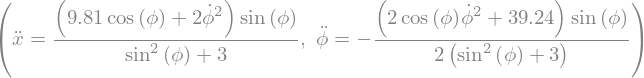

In [24]:
g_magnitude = 9.81 # [m s-2]
m1_magnitude = 3 # [kg]
m2_magnitude = 1 # [kg]
l_magnitude = 2 # [m]
magnitudes = {
    g : g_magnitude,
    m1 : m1_magnitude,
    m2 : m2_magnitude,
    l : l_magnitude,
}
x_pp_magnitudes = x_pp.subs(magnitudes) # [m s-2]
phi_pp_magnitudes = phi_pp.subs(magnitudes) # [m s-2]
x_pp_magnitudes, phi_pp_magnitudes

We can see that both generalized coordinates are not constant, they change with the corresponding values of generalized coordinates and their derivatives, $\ddot{x}$ and $\ddot{\phi}$.
We need to express these as functions, $\ddot{x}= \ddot{x}(\phi, \dot{\phi})$ and $\ddot{\phi} = \ddot{\phi}(\phi, \dot{\phi})$, to perform the numerical integration. 

### Generating functions from SymPy expressions

The `SymPy` library has a method called `lambdify` to convert a symbolic expression into a function that takes generalized coordinates and velocities as inputs.
We have to define these variables explicitly.
These are contained in the state vector $\vec{y}$.

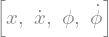

In [25]:
y

In [26]:
x_pp_lambda = sm.lambdify(y, x_pp_magnitudes.rhs) # [m s-2], y is the state vector
phi_pp_lambda = sm.lambdify(y, phi_pp_magnitudes.rhs) # [m s-2]

Let's check that the new type generated by `lambdify` is a function.

In [27]:
type(x_pp_lambda), type(x_pp_magnitudes.rhs)

(function, sympy.core.mul.Mul)

### Initial conditions
Now we set the initial conditions and the range for times.

In [28]:
# library for numerical analysis
import numpy as np

In [29]:
# if we need a number such as Pi, it must be from numpy
y_initial = [1, 0.5, np.pi/8, 0
            ] # [SI units] ordered for the state vector
t_range = np.linspace(0, 10, 100) # initial and final times, and how many intermediate values.

We integrate through the steps in `t_range`.

> Reference:
> - https://docs.scipy.org/doc/scipy/tutorial/integrate.html

In [30]:
# library for scientific calculations: efficient tools for numerical analysis
# We import the function solve_ivp: it solves a system of ODEs with initial conditions.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp

In [31]:
# we define a function con the system of derivatives
# t : it's not used in this system, but we leave for a later use
# y : list of states with [y[0], y[1], y[2], y[3]]
# y[0]: x
# y[1]: x dot
# y[2]: phi
# y[3]: phi dot
# dydt : list of derivatives
def y_dot(t, y):
    dydt = [y[1],
            x_pp_lambda(y[0], y[1], y[2], y[3]),
            y[3],
            phi_pp_lambda(y[0], y[1], y[2], y[3]),
           ]
    return dydt

In [32]:
# Integration through steps in time
y_ode2 = solve_ivp(y_dot, (t_range[0], t_range[-1] ), y_initial, t_eval = t_range)

In [33]:
y_ode2.y[0]

array([1.        , 1.05611753, 1.12333151, 1.20123954, 1.28872106,
       1.38383566, 1.48351532, 1.58411122, 1.6817158 , 1.77283761,
       1.85509528, 1.92696432, 1.98782758, 2.037585  , 2.07601428,
       2.10344056, 2.12082305, 2.12968318, 2.13257082, 2.13290777,
       2.13468443, 2.14158796, 2.1564687 , 2.18117343, 2.21658744,
       2.26320442, 2.3211199 , 2.3900307 , 2.4694781 , 2.55831062,
       2.65435451, 2.75446455, 2.85478407, 2.95152145, 3.04145187,
       3.12219166, 3.1925214 , 3.25172632, 3.29966745, 3.33656127,
       3.36255683, 3.37854496, 3.3863449 , 3.3886645 , 3.38908361,
       3.39149605, 3.39952068, 3.41585132, 3.44214967, 3.47919928,
       3.52751033, 3.58715493, 3.65774733, 3.73870236, 3.82876785,
       3.92565072, 4.02605926, 4.12608892, 4.22196496, 4.31062077,
       4.38983182, 4.45852338, 4.51606497, 4.5623019 , 4.59750632,
       4.62197338, 4.63663957, 4.64343419, 4.64524172, 4.64575123,
       4.64883394, 4.65797883, 4.67574217, 4.70367746, 4.74248

## Graphing

In [34]:
# library for graphs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{x}$ [m/s]'),
 Text(0.5, 1.0, 'Velocity')]

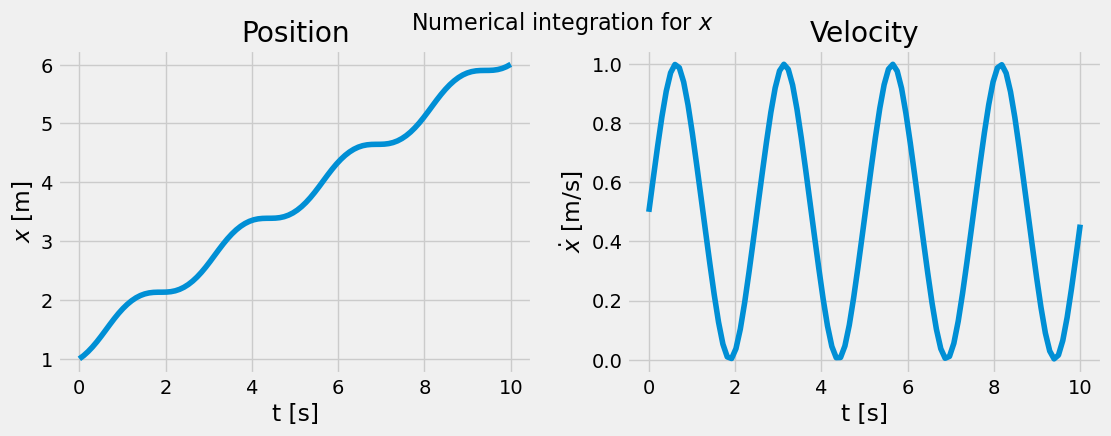

In [35]:
solution = y_ode2
nameCoordinate = 'x'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # two figures in the same row
fig.suptitle('Numerical integration for $'+ nameCoordinate + '$', fontsize=16)
ax[0,0].plot(solution.t, solution.y[0]) # position x
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nameCoordinate + '$ [m]', title='Position')
ax[0,1].plot(solution.t, solution.y[1]) # velocity x
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nameCoordinate + '}$ [m/s]', title='Velocity')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{\\phi}$ [rad/s]'),
 Text(0.5, 1.0, 'Velocity')]

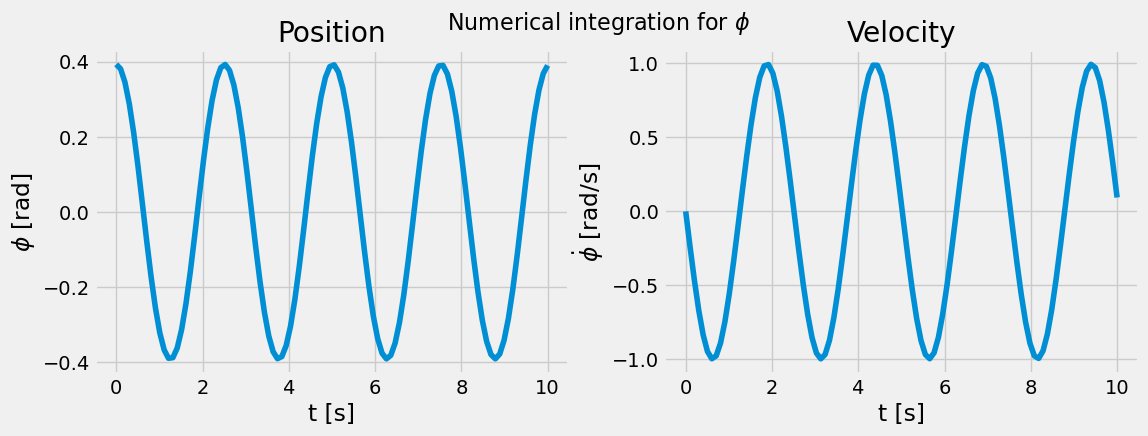

In [36]:
solution = y_ode2
nameCoordinate = '\phi'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # two figures in the same row
fig.suptitle('Numerical integration for $'+ nameCoordinate + '$', fontsize=16)
ax[0,0].plot(solution.t, solution.y[2]) # position phi
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nameCoordinate + '$ [rad]', title='Position')
ax[0,1].plot(solution.t, solution.y[3]) # velocity phi
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nameCoordinate + '}$ [rad/s]', title='Velocity')